In [3]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>



#  Дисперсионный анализ

Рассмотренный ранее **t-критерий Стьюдента** (равно как и его непараметрические аналоги) предназначен для сравнения исключительно **двух совокупностей**. В таком случае мы можем применять однофакторный дисперсионный анализ.  Та переменная, которая будет разделять наших испытуемых или наблюдения на группы (номинативная переменная с нескольким градациями) называется **независимой переменной**. А та количественная переменная, по степени выраженности которой мы сравниваем группы, называется **зависимая переменная**. 


$$ SS_{total} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x})^2}} = SS_{between} + SS_{within} $$
$$ SS_{between} = \sum_{j=1}^{p}{n_j{(\bar{x}_j - \bar{x})^2}} $$
$$ SS_{within} = \sum_{j=1}^{p}{\sum_{i=1}^{n_j}{(x_{ij} - \bar{x}_j)^2}} $$


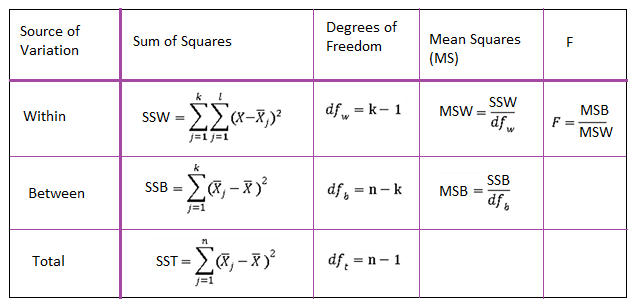

In [2]:
from IPython.display import Image
Image("var_analysis.png")

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 12.0


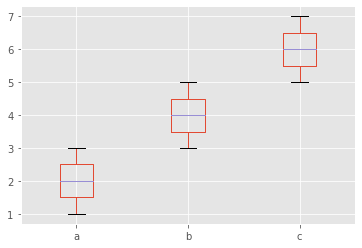

In [3]:
# Выборки которые надо сравнить
data =\
    pd.DataFrame({
        'a': [3, 1, 2],
        'b': [5, 3, 4],
        'c': [7, 6, 5]
    })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in data.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in data.mean().items())
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
# Степени свободы
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

In [5]:
data.mean().items()

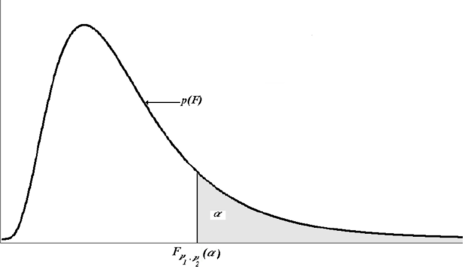

In [4]:
# Распределение F-значения
Image('fisher_dist.png')

Посмотрим, на распределение в нашем случае
- https://gallery.shinyapps.io/dist_calc/ 



<div class="alert alert-info">
<b>Задача: </b>
    
Проанализируйте синтетический датасет с данными. У вас есть наблюдения по 4 группам попытайтесь придумать кейс, когда вы анализируете некий признак в 4 группах. Что это за группы? Какие выводы можно сделать понаблюдав за тем как распределены данные и что показывают у нас тесты?    
</div>

### Мы значит директоры завода чипсов, и у нас есть 4 поставщика картофеля с 4 полей, нужно сравнить равны ли урожаи этих полей
* Н0 A=B=C=D
* H1 !(A=B=C=D)

    A   B   C   D
0  25  45  30  54
1  30  55  29  60
2  28  29  33  51
3  36  56  37  62
4  29  40  27  73


<AxesSubplot:>

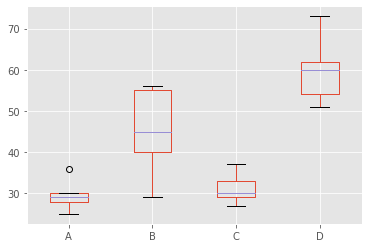

In [6]:
df =\
    pd.DataFrame([[25, 45, 30, 54],
                  [30, 55, 29, 60],
                  [28, 29, 33, 51],
                  [36, 56, 37, 62],
                  [29, 40, 27, 73]],
                 columns=['A', 'B', 'C', 'D'])
print(df)
df.boxplot()

In [10]:
# общая средняя
grand_mean = df.values.flatten().mean()

# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for val in df.values.flatten())
# отклонение групповых средний от общей средней
ssb = sum(df[group].size * (group_mean - grand_mean) ** 2 for group, group_mean in df.mean().items())
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in df[group]) for group, group_mean in df.mean().items())

groups = df.shape[1]
print('Чсло групп: ', groups)
# Степени свободы
dfb = groups - 1
print('Чсло степений свободы при расчете дисперсии между группами: ', dfb)
dfw = df.size - groups
print('Чсло степений свободы при расчете дисперсии внутри группы: ', dfw)
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")

Чсло групп:  4
Чсло степений свободы при расчете дисперсии между группами:  3
Чсло степений свободы при расчете дисперсии внутри группы:  16
Результат:
отклоняем нулевую гипотезу
Полученное f-значение 17.492810457516338


### Как умные люди статистически доказали что при таких данных такого количества поставщиков картофеля (Это все о степенях свободы) урожайность полей поставщиков не равны. Если честно из боксплота все понятно было, нужно бы не такие очевидные вещи посмотреть

<div class="alert alert-info">
<b>Задача: </b>    
    
Есть некоторые данные об измерении раковины  у мидии Mytilus trossulus из пяти мест: 
Тилламук, Ньюпорт, Петербург, Аляска, Магадан и Твермин.
    
Осуществить дисперсионный анализ, визуализируйте данные. 
    
Если удастся визуально выделить данные в группы (например 2 города в одной, 3 в другой), сравнить выборки внутри полученных групп.   
</div>

In [17]:
tillamook = [0.0571, 0.0813, 0.0831, 0.0976, 0.0817, 0.0859, 0.0735, 0.0659, 0.0923, 0.0836]
newport = [0.0873, 0.0662, 0.0672, 0.0819, 0.0749, 0.0649, 0.0835, 0.0725]
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764, 0.0689]
tvarminne = [0.0703, 0.1026, 0.0956, 0.0973, 0.1039, 0.1045]

### Очень странно, в условии перечислины 6 мест а данные из 5 мест и списки из 5 мест

In [30]:
list_of_mussels_places = [tillamook, newport, petersburg, magadan, tvarminne]

In [32]:
df_of_mussels_places = pd.DataFrame(list_of_mussels_places)
df_of_mussels_places = pd.pivot_table(df_of_mussels_places, columns=['tillamook', 'newport', 'petersburg', 'magadan', 'tvarminne'])
df_of_mussels_places

,magadan,newport,petersburg,tillamook,tvarminne
0,0.1033,0.0873,0.0974,0.0571,0.0703
1,0.0915,0.0662,0.1352,0.0813,0.1026
2,0.0781,0.0672,0.0817,0.0831,0.0956
3,0.0685,0.0819,0.1016,0.0976,0.0973
4,0.0677,0.0749,0.0968,0.0817,0.1039
5,0.0697,0.0649,0.1064,0.0859,0.1045
6,0.0764,0.0835,0.1050,0.0735,NaN
7,0.0689,0.0725,NaN,0.0659,NaN
8,NaN,NaN,NaN,0.0923,NaN
9,NaN,NaN,NaN,0.0836,NaN


<AxesSubplot:>

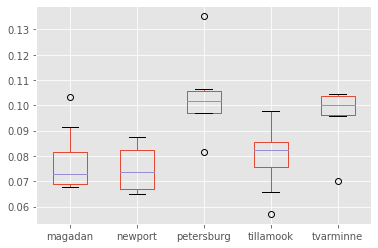

In [84]:
df_of_mussels_places.boxplot()

In [59]:
pd.DataFrame.mean(df_of_mussels_places)

magadan       0.078012
newport       0.074800
petersburg    0.103443
tillamook     0.080200
tvarminne     0.095700
dtype: float64

In [58]:
#Общая средняя
grand_mean = 0.0
for mean in pd.DataFrame.mean(df_of_mussels_places):
    grand_mean += mean
    
grand_mean /= len(pd.DataFrame.mean(df_of_mussels_places))
grand_mean

0.08643107142857143

In [67]:
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for vals in list_of_mussels_places for val in vals)
sst

0.00997368593762755

In [69]:
# отклонение групповых средний от общей средней
ssb = sum(len(place) * (np.mean(place) - grand_mean) ** 2 for place in list_of_mussels_places)
ssb

0.004578780044770411

In [70]:
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - np.mean(place))**2 for x in place) for place in list_of_mussels_places)
ssw

0.0053949058928571434

In [71]:
ssw + ssb

0.009973685937627555


## О, кажется все правильно посчитал. Если есть возможность применять методы для подсчета вот этих харрактеристик к датафрейму с пропусками напишите в ответе на ДЗ пожалуста

In [73]:
groups = df_of_mussels_places.shape[1]
groups

5

In [76]:
# Степени свободы при расчете отклонения между группами и внутри группы соответственно
dfb = groups - 1
print(dfb)
dfw = sum(len(place) for place in list_of_mussels_places) - groups
dfw

4


34

## Чуть было не посчитал с пустыми значениями в датафрейме

In [78]:
# межгрупповой средний квадрат
mssb = ssb/dfb
mssb

0.0011446950111926027

In [79]:
# внутригрупповой средний квадрат
mssw = ssw/dfw
mssw

0.00015867370273109246

In [81]:
f_value = mssb/mssw
f_value

7.214144445425468

In [83]:
p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")
p

Результат:
отклоняем нулевую гипотезу
Полученное f-значение 7.214144445425468


0.0002557890825835188

## На основе похожести распределения данных Магадана Ньюпорта и Тилламука выделим их в отдельную группу и посмотрим дисперсионных алазиз внутри неё. Аналогично с оставшимися Твермином и Питербургом

In [85]:
list_of_group_one = [magadan, newport, tillamook]
list_of_group_two = [tvarminne, petersburg]

# Первая выделенная группа

In [92]:
# общая средняя
grand_mean = 0.0
for place in list_of_group_one:
    grand_mean += np.mean(place)

grand_mean /= len(list_of_group_one)
    
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for vals in list_of_group_one for val in vals)
print('Общая сумма квадратов:', sst)
# отклонение групповых средний от общей средней
ssb = sum(len(place) * (np.mean(place) - grand_mean) ** 2 for place in list_of_group_one)
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - np.mean(place))**2 for x in place) for place in list_of_group_one)

print("Проверочная сумма квадратов:", ssw + ssb )

groups = len(list_of_group_one)
print('Чсло групп: ', groups)
# Степени свободы
dfb = groups - 1
print('Чсло степений свободы при расчете дисперсии между группами: ', dfb)
dfw = sum(len(place) for place in list_of_group_one) - groups
print('Чсло степений свободы при расчете дисперсии внутри группы: ', dfw)
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")
p

Общая сумма квадратов: 0.00310924295138889
Проверочная сумма квадратов: 0.0031092429513888895
Чсло групп:  3
Чсло степений свободы при расчете дисперсии между группами:  2
Чсло степений свободы при расчете дисперсии внутри группы:  23
Результат:
НЕ отклоняем нулевую гипотезу
Полученное f-значение 0.5051668331192698


0.6099452691559093

# Вторая выделенная группа

In [93]:
# общая средняя
grand_mean = 0.0
for place in list_of_group_two:
    grand_mean += np.mean(place)

grand_mean /= len(list_of_group_two)
    
# Общая сумма квадратов sst = ssb + ssw
sst = sum((val - grand_mean)**2 for vals in list_of_group_two for val in vals)
print('Общая сумма квадратов:', sst)
# отклонение групповых средний от общей средней
ssb = sum(len(place) * (np.mean(place) - grand_mean) ** 2 for place in list_of_group_two)
# отклонения значений внутри группы от средней группы
ssw = sum(sum((x - np.mean(place))**2 for x in place) for place in list_of_group_two)

print("Проверочная сумма квадратов:", ssw + ssb )

groups = len(list_of_group_two)
print('Чсло групп: ', groups)
# Степени свободы
dfb = groups - 1
print('Чсло степений свободы при расчете дисперсии между группами: ', dfb)
dfw = sum(len(place) for place in list_of_group_two) - groups
print('Чсло степений свободы при расчете дисперсии внутри группы: ', dfw)
# межгрупповой средний квадрат
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')
print(f"Полученное f-значение {f_value}")
p

Общая сумма квадратов: 0.0026113406122448965
Проверочная сумма квадратов: 0.0026113406122448973
Чсло групп:  2
Чсло степений свободы при расчете дисперсии между группами:  1
Чсло степений свободы при расчете дисперсии внутри группы:  11
Результат:
НЕ отклоняем нулевую гипотезу
Полученное f-значение 0.8869359393204989


0.3665322486640173

# Ну вот, при выделении мест измерений в группы F значение получилось недостаточным для отклонения гипотезы похожести данных

# почему мы не можем применить t-критерий для более двух выборок
**применяя его попарно к каждой выбрке**

Чтобы выяснить это, сделаем эксперемент.

In [7]:
from numpy import random
from scipy.stats import t

def pair_t(samples, alpha):
    '''Парный t-критерий, если все выборки равны, возвращает True'''
    n_samples = samples.shape[0]
    # https://ru.wikipedia.org/wiki/Сочетание
    n_combinations = n_samples*(n_samples - 1)//2
    result = np.zeros(n_combinations, dtype=bool)
    k = 0
    for i in range(n_samples):
        for j in range(i+1, n_samples):
            N = samples[i].size
            std_err = np.sqrt((samples[i].std()**2) /
                              N + (samples[j].std()**2)/N)
            t_value = (samples[i].mean() + samples[j].mean())/std_err
            p = t.sf(t_value, N-2)
            result[k] = p >= alpha
            k += 1
    return np.all(result)


def pair_t_test(repeat, n_samples, sample_size, ax, alpha=0.05):
    '''
    функция показывает, сколько у нас будет ложных результатов, при парном сравнение множества выборок
    с помощью t-критерия

    repeat - количество повторов
    n_samples - количество выборок в каждом повторе
    sample_size - размер выборки

    ax - для рисования
    alpha = (1 - (p-уровень значимости))
    '''
    result = np.zeros(repeat, dtype=bool)
    for i in range(repeat):
        samples = random.randn(n_samples, sample_size)
        result[i] = pair_t(samples, alpha)

    unique, counts = np.unique(result, return_counts=True)
    percentage = counts/result.size
    ax.pie(percentage, labels=unique, autopct='%.0f%%')

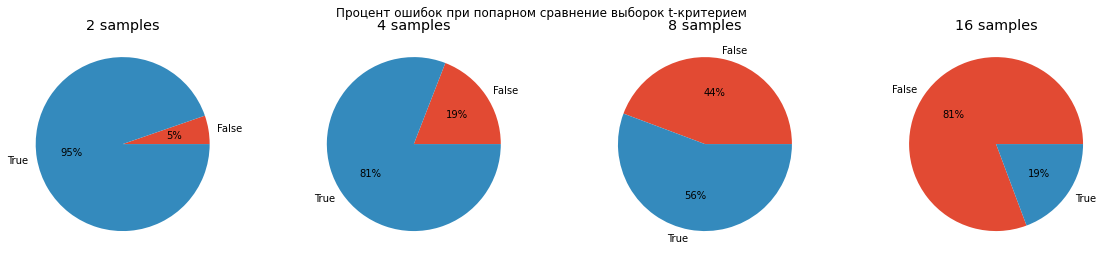

In [8]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием')

for n, ax in zip(n_samples, axs):
    pair_t_test(1000, n, 30, ax)
    ax.set_title(f'{n} samples')
    

Как мы и ожидаем, степень ошибки равна **5%**, при сравнение **двух выборок** из одной ГС с помощью t-критерия с p-уровнем значимости **95%**. Если мы возмём **4** выборки, и сравним их попарно, то ошибка возрастёт в **4** раза до **20%**. При **8** выборок, наша ошибка возрасла почти в **9** раз до **46%**. **16** выборок дают увеличение ошибки до **80%** ( в 16 раз), что совершенно неприемлемо.

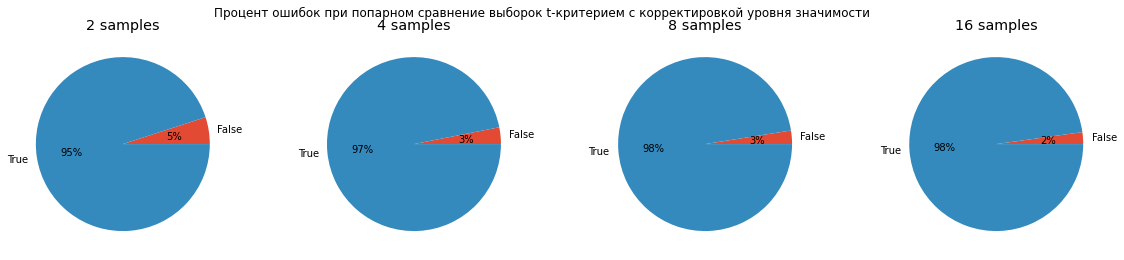

In [9]:
fig, axs = plt.subplots(ncols=4, figsize=(20, 4))
n_samples = [2, 4, 8, 16]
fig.suptitle('Процент ошибок при попарном сравнение выборок t-критерием с корректировкой уровня значимости')

for n, ax in zip(n_samples, axs):
    alpha = 0.05/((n*(n-1))/2) # делим на число сравнений = ((n*(n-1))/2) - поправка Бонферрони 
    pair_t_test(1000, n, 30, ax, alpha)
    ax.set_title(f'{n} samples')

Однако в данном случае эта будет арх-консервативная корректировавка, которая имеет меньше вероятность найти реальные значения. По сути мы **уменьшаем шанс получить ошибку I рода, но увеличиваем шанс на ошибку II рода**.


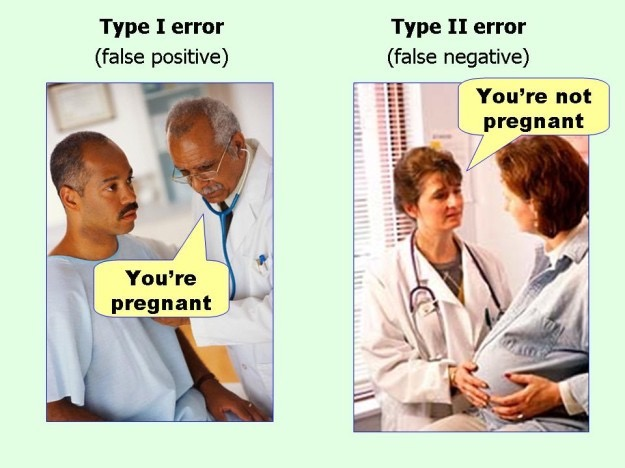

In [10]:
Image('error_types.jpeg')


# Задачи с самостоятельным выбором теста

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

Если возникают сложности по ходу решения - пиште свой вопрос в общий чат в Slack. Там всегда подскажут) 




<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

### Так как значений только 2 логично использовать коэффициент Стьюдента

In [3]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Н0 A=B
# H1 !A=B

In [6]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

In [40]:
def hist_this(list_of_arrays):
    """Построение гистограмм значений поданных на вход в виде массива"""
    list_of_colors = ['red', 'blue', 'green', 'yellow']
    
    for i, array in enumerate(list_of_arrays):
        plt.hist(array, alpha=0.5, weights=[1./len(array)]*len(array))
        plt.axvline(array.mean(), color=list_of_colors[i], alpha=0.8, linestyle='dashed')
        

In [36]:
plt.legend?

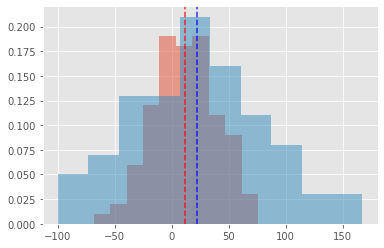

In [34]:
hist_this([A, B])

## Так как p-value меньше 0.05 заключаем что разница в эффекте от препаратов есть

<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [35]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

# Ваш код.


In [36]:
stats.ttest_ind(A, B)

Ttest_indResult(statistic=-1.733800647210997, pvalue=0.08451003973499756)

# Препарат оказывает какое то действие.

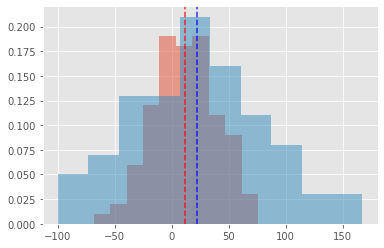

In [37]:
hist_this([A, B])

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [1]:
water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

groups = [water, nutri, mineral]
# Ваш код.

In [2]:
df = pd.DataFrame(data=groups)
df = pd.pivot_table(df, columns=['water', 'nutri', 'mineral'])
df.boxplot()

NameError: name 'pd' is not defined

In [47]:
dfb = len(groups) - 1
print('Чсло степений свободы при расчете дисперсии между группами: ', dfb)
dfw = sum(len(irrigation) for irrigation in groups) - len(groups)
print('Чсло степений свободы при расчете дисперсии внутри группы: ', dfw)

Чсло степений свободы при расчете дисперсии между группами:  2
Чсло степений свободы при расчете дисперсии внутри группы:  59


In [39]:
F, p = stats.f_oneway(water, nutri, mineral)
print(F, p)

12.525963044834192 2.9240047906326866e-05


In [50]:
stats.f.ppf(0.05, 2, 59)

0.051337913499452034

# Разница в поливе водой/минералкой и удобрениями есть

<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гопотезы, используя тесты, изученные в течение курса
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему? 



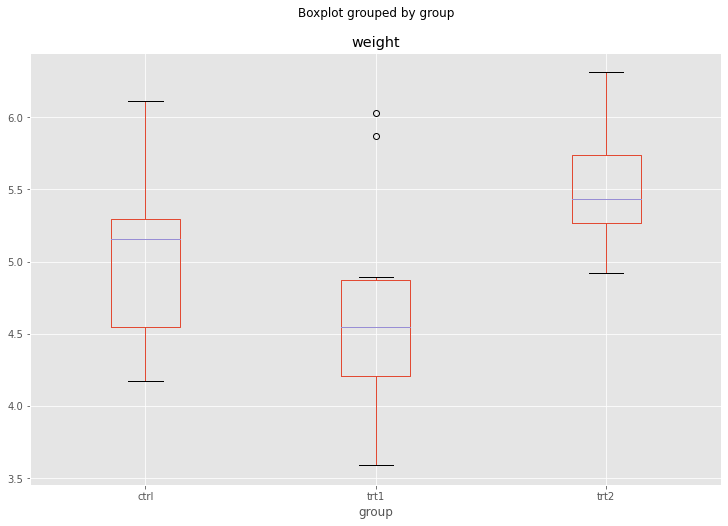

In [62]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));


In [65]:
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [64]:
data = df.drop(columns='Unnamed: 0')

KeyError: "['Unnamed: 0'] not found in axis"

# A/B - тесты 
## Cookie Cats 

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. 
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [66]:
data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет
data.head()

/tmp/ipykernel_3690/3106034194.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('cookie_cats.csv', error_bad_lines=False)  # Откроем датасет


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычным `matplotlib`
</div>

In [15]:
# Посмотрим на количество участников теста.
data.groupby('version').version.count()

version
gate_30    44700
gate_40    45489
Name: version, dtype: int64

In [16]:
data.groupby('version').sum()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,222944098441,2344795,20034,8502
gate_40,227857702576,2333530,20119,8279


In [17]:
data.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [18]:
# Ваши выводы

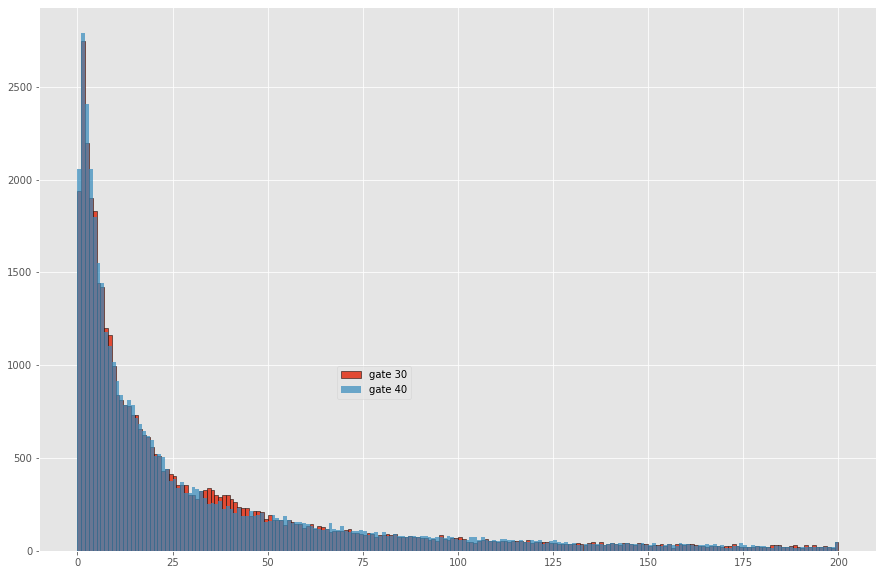

In [19]:
v_30 = data.loc[data.version == 'gate_30']
v_40 = data.loc[data.version == 'gate_40']
v_30 = v_30.drop(v_30.loc[v_30.sum_gamerounds > 200].index)
v_40 = v_40.drop(v_40.loc[v_40.sum_gamerounds > 200].index)


bins = 200
plt.figure(figsize=(15, 10))
plt.hist(v_30['sum_gamerounds'], bins=bins, alpha=1,
         edgecolor='black', label='gate 30')
plt.hist(v_40['sum_gamerounds'], bins=bins, alpha=0.7, label='gate 40')
plt.legend(loc='upper right', bbox_to_anchor=(0.45, 0.35))
plt.show()

# Так как игроки которые имеют ворота на 40 уровне в первые дни реже встречаются с ними приводит к небольшому увелечению онлайна и возвращения в первые дни. Но с течением дней мы видим что у ворот 30 уровня появляется преимущество на 30 - 50 днях по онлайну из чего мы делаем вывод что передвигать на 40 уровень не имеет смысла.

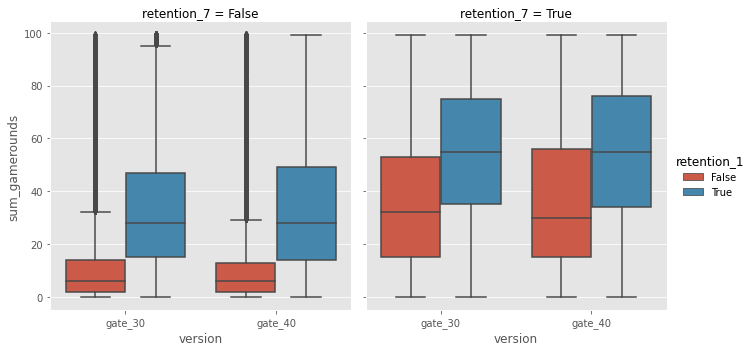

In [21]:
df = data.loc[data['sum_gamerounds'] < 100].copy();


sns.catplot(x="version", y="sum_gamerounds",
            hue="retention_1", col = 'retention_7',
            data=df, kind="box",
            height=5, aspect=.95);


In [22]:
from scipy.stats import f_oneway
#from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код.
f, p = f_oneway(data[data['version'] == 'gate_30']['sum_gamerounds'],
                data[data['version'] == 'gate_40']['sum_gamerounds'])
f, p
#stat, p = mannwhitneyu(data[data['version'] == 'gate_30']['sum_gamerounds'], data[data['version'] == 'gate_40']['sum_gamerounds'])
#print('Statistics=%.3f, p=%.3f' % (stat, p))

(0.7939569526814368, 0.3729086824696095)

<div class="alert alert-info">
<b>Задание: Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот. </b>
</div>


In [23]:
from scipy.stats import f_oneway
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu
import scipy.stats as stats

# Ваш код.

**Ваши выводы?** 

<Figure size 1080x720 with 0 Axes>

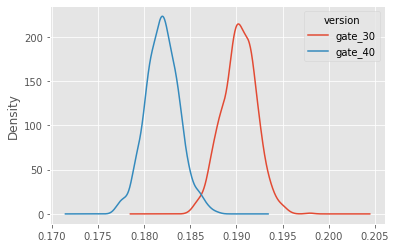

In [24]:
# Применяем Bootstrap для того, чтобы более наглядно убедиться в наличии различий

# Creating an list with bootstrapped means for each AB-group
plt.figure(figsize=(15, 10))
# boot_1d - собираем статистику по средним, для неё можно применить t-тест
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac=1, replace=True).groupby(
        'version')['retention_7'].mean()  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='density')

In [25]:
# сделайте выводы, используя t-тест для retention_1 и retention_7

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [4]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет
pokemon.head()


# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

/tmp/ipykernel_7164/354238790.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)  # Откроем датасет


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [88]:
pokemon.loc[((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] == 'Rock')
             |
            (pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] == 'Grass')), :]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
377,378,Lileep,Rock,Grass,66,41,77,61,87,23,False
378,379,Cradily,Rock,Grass,86,81,97,81,107,43,False


In [100]:
pokemon_cr = pokemon.loc[~((pokemon['Class 1'] == 'Grass') & (pokemon['Class 2'] == 'Rock')
                              |
                              (pokemon['Class 1'] == 'Rock') & (pokemon['Class 2'] == 'Grass')), :]

In [101]:
pokemon_grass = pokemon_cr.loc[(pokemon_cr['Class 1'] == 'Grass') | (pokemon_cr['Class 2'] == 'Grass'), ['Name', 'Attack']]
pokemon_grass.head()

,Name,Attack
0,Bulbasaur,49
1,Ivysaur,62
2,Venusaur,82
3,Mega Venusaur,100
48,Oddish,50


In [102]:
pokemon_rock = pokemon_cr.loc[(pokemon_cr['Class 1'] == 'Rock') | (pokemon_cr['Class 2'] == 'Rock'), ['Name', 'Attack']]
pokemon_rock.head()

,Name,Attack
80,Geodude,80
81,Graveler,95
82,Golem,120
103,Onix,45
119,Rhyhorn,85


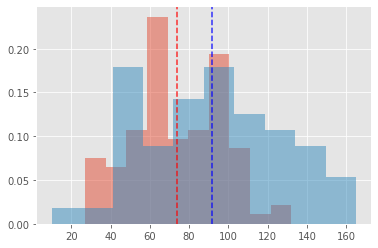

In [98]:
hist_this([pokemon_grass['Attack'], pokemon_rock['Attack']])

In [99]:
stats.ttest_ind(pokemon_grass['Attack'], pokemon_rock['Attack'])

Ttest_indResult(statistic=-3.729457582692065, pvalue=0.00027333381459902653)

## Так как расчитанное значение Т критерия Стьюдента меньше теоритического табличного атаки покемонов статистически не различимы

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [104]:
pokemon.loc[((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal')
             |
            (pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Water')), :]

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
445,446,Bibarel,Normal,Water,79,85,60,55,60,71,False


In [105]:
pokemon_wn = pokemon.loc[~((pokemon['Class 1'] == 'Water') & (pokemon['Class 2'] == 'Normal')
             |
            (pokemon['Class 1'] == 'Normal') & (pokemon['Class 2'] == 'Water')), :]`

In [112]:
pokemon_water = pokemon_wn.loc[(pokemon_wn['Class 1'] == 'Water') | (pokemon_wn['Class 2'] == 'Water'), ['Name', 'Speed']]
pokemon_water.head()

,Name,Speed
9,Squirtle,43
10,Wartortle,58
11,Blastoise,78
12,Mega Blastoise,78
59,Psyduck,55


In [111]:
pokemon_norm = pokemon_wn.loc[(pokemon_wn['Class 1'] == 'Normal') | (pokemon_wn['Class 2'] == 'Normal'), ['Name', 'Speed']]
pokemon_norm.head()

,Name,Speed
20,Pidgey,56
21,Pidgeotto,71
22,Pidgeot,101
23,Mega Pidgeot,121
24,Rattata,72


In [115]:
pokemon_water['Speed']

9      43
10     58
11     78
12     78
59     55
       ..
759    68
760    30
762    44
763    59
799    70
Name: Speed, Length: 125, dtype: int64

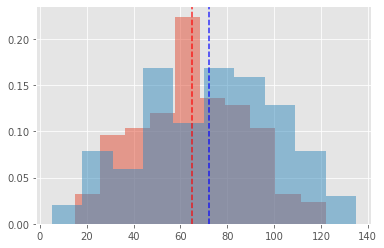

In [117]:
hist_this([pokemon_water['Speed'], pokemon_norm['Speed']])

In [118]:
stats.ttest_ind(pokemon_water['Speed'], pokemon_norm['Speed'])

Ttest_indResult(statistic=-2.150913330007121, pvalue=0.03255353551391033)

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [10]:
speeded_pokemons = pokemon.loc[pokemon['Name'].isin(treathed_pokemon), :]
speeded_pokemons

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [12]:
unspeeded_pokemons = pokemon.loc[~pokemon['Name'].isin(treathed_pokemon), :]
unspeeded_pokemons

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True


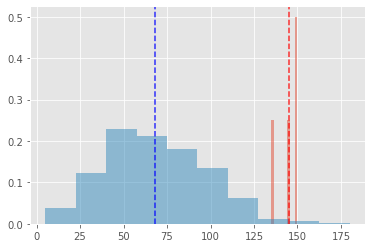

In [13]:
hist_this([speeded_pokemons['Speed'], unspeeded_pokemons['Speed']])

### Данных слишком мало для какого либо анализа, но бустер к скорости выглядит похожим на правду

In [14]:
stats.ttest_ind(speeded_pokemons['Speed'], unspeeded_pokemons['Speed'])

Ttest_indResult(statistic=5.385407401082377, pvalue=9.51510117630786e-08)

In [6]:
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [5]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [15]:
def sum_the_specifications(df):
    """Суммируем HP, Attack, Defense покемонов в выбранном датафрейме"""
    
    return df['HP'] + df['Attack'] + df['Defense']

In [18]:
def comp_the_specifications(df):
    """Перемножаем HP, Attack, Defense покемонов в выбранном датафрейме"""
    
    return df['HP'] * df['Attack'] * df['Defense']

In [19]:
pokemon_sum_comp = pokemon
pokemon_sum_comp['Specifications_sum'] = pokemon_sum_comp.apply(sum_the_specifications, axis=1)
pokemon_sum_comp['Specifications_comp'] = pokemon_sum_comp.apply(comp_the_specifications, axis=1)
pokemon_sum_comp

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Specifications_sum,Specifications_comp
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,143,108045
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,185,234360
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,245,544480
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False,303,984000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False,134,87204
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,True,300,750000
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,True,320,880000
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,True,250,528000
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,True,300,768000


In [22]:
leg_pokemon = pokemon_sum_comp.loc[pokemon_sum_comp['Legendary'] == True, ['Name', 'Specifications_sum', 'Specifications_comp']]
leg_pokemon

,Name,Specifications_sum,Specifications_comp
156,Articuno,275,765000
157,Zapdos,265,688500
158,Moltres,280,810000
162,Mewtwo,306,1049400
163,Mega Mewtwo X,396,2014000
...,...,...,...
795,Diancie,300,750000
796,Mega Diancie,320,880000
797,Hoopa Confined,250,528000
798,Hoopa Unbound,300,768000


In [23]:
unleg_pokemon = pokemon_sum_comp.loc[~pokemon_sum_comp['Legendary'] == True, ['Name', 'Specifications_sum', 'Specifications_comp']]
unleg_pokemon

,Name,Specifications_sum,Specifications_comp
0,Bulbasaur,143,108045
1,Ivysaur,185,234360
2,Venusaur,245,544480
3,Mega Venusaur,303,984000
4,Charmander,134,87204
...,...,...,...
787,Gourgeist Super Size,307,1037000
788,Bergmite,209,322575
789,Avalugg,396,2045160
790,Noibat,105,42000


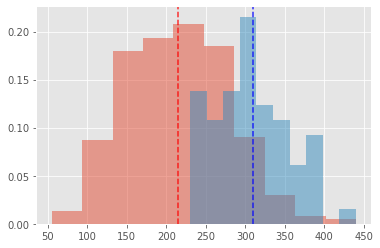

In [24]:
hist_this([unleg_pokemon['Specifications_sum'], leg_pokemon['Specifications_sum']])

In [27]:
stats.ttest_ind(unleg_pokemon['Specifications_sum'], leg_pokemon['Specifications_sum'])

Ttest_indResult(statistic=-11.591852366462316, pvalue=7.970942205722087e-29)

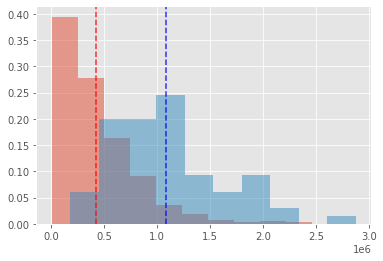

In [25]:
hist_this([unleg_pokemon['Specifications_comp'], leg_pokemon['Specifications_comp']])

In [29]:
stats.ttest_ind(unleg_pokemon['Specifications_comp'], leg_pokemon['Specifications_comp'])

Ttest_indResult(statistic=-13.263253408231844, pvalue=1.992664308842282e-36)

# Легендарки явно покруче будут

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [30]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


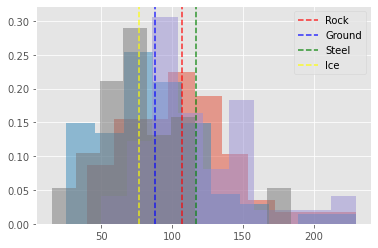

In [39]:
list_for_hist = []
for pok in best_defence_class:
    pok_df = pokemon.loc[(pokemon['Class 1'] == pok)
                          | 
                          (pokemon['Class 2'] == pok), 'Defense']
    list_for_hist.append(pok_df)
    
hist_this(list_for_hist)
plt.legend(best_defence_class)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b2c12a9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b2c12a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b2c12e430>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8b2c12ad60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b2c1170d0>,
 'means': []}

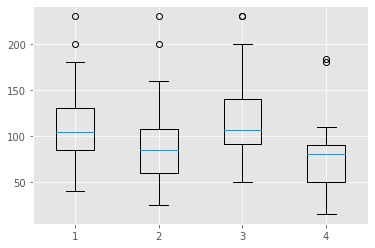

In [41]:
plt.boxplot(list_for_hist)

In [48]:
def_classes = pokemon.loc[(pokemon['Class 1'].isin(best_defence_class))
                          |
                          (pokemon['Class 2'].isin(best_defence_class)), 'Defense']
def_classes

32      85
33     110
36      87
39      77
55      25
      ... 
788     85
789    184
794    121
795    150
796    110
Name: Defense, Length: 189, dtype: int64

In [49]:
other_classes = pokemon.loc[~((pokemon['Class 1'].isin(best_defence_class))
                          |
                          (pokemon['Class 2'].isin(best_defence_class))), 'Defense']
other_classes

0       49
1       63
2       83
3      123
4       43
      ... 
792     95
793     95
797     60
798     60
799    120
Name: Defense, Length: 611, dtype: int64

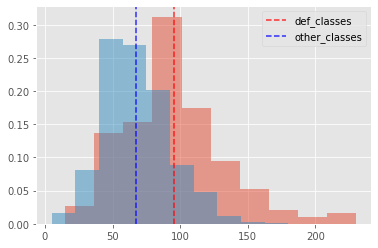

In [51]:
hist_this([def_classes, other_classes])
plt.legend(['def_classes', 'other_classes'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8b2c0741f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8b2c2aa820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8b2c27ba00>,
 'medians': [<matplotlib.lines.Line2D at 0x7f8b2c2aa6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8b2c2aaa00>,
 'means': []}

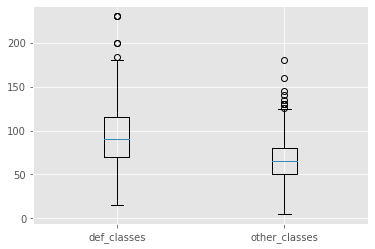

In [53]:
plt.boxplot([def_classes, other_classes], labels=['def_classes', 'other_classes'])


In [54]:
stats.ttest_ind(def_classes, other_classes)

Ttest_indResult(statistic=11.945979324661325, pvalue=2.229911129008596e-30)

# Что то я так и не разобрался как инторпретировать значения критерия Стьюдента, вроде как и по таблице а значение ПИВАлью такого в таблице нет. Классы выделенные как особо защищенные действительно имеют защиту больше чем остальные классы но разброс большой
